In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as proc
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
pd.options.display.max_columns = None

all_df = pd.read_csv('merged_genomic_metadata.csv')
all_df = all_df[all_df['Variant_Type'] == 'SNP']
# all_df = all_df.dropna(subset='ONCOGENIC')
drop_columns = pd.read_csv('columns_to_drop.txt')
columns_saved = pd.read_csv('megtart.txt')
question = pd.read_csv('kerdojelé.txt')
level = pd.read_csv('level.txt')

columns_saved_columns = columns_saved.columns.tolist()
question_columns = question.columns.tolist()
level_columns = level.columns.tolist()

C:\Users\Zoli\AppData\Local\Temp\ipykernel_8688\439475391.py:3: DtypeWarning: Columns (4,118,119,120,122,126,128,129,130,131,132,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv('merged_genomic_metadata.csv')


In [3]:
data = all_df[columns_saved_columns]
#data_question = all_df[question_columns]
data_level = all_df[level_columns]

In [4]:
data[:50]


,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,Exon_Number,t_depth,t_ref_count,t_alt_count,Allele,cDNA_position,CDS_position,Protein_position,Codons,STRAND_VEP,BIOTYPE,CANONICAL,EXON,INTRON,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,IMPACT,HGVS_OFFSET,GENE_PHENO,FILTER,flanking_bps,vcf_qual,MUTATION_EFFECT,ONCOGENIC
0,1,2488139,2488139,Nonsense_Mutation,SNP,G,G,A,c.36G>A,p.Trp12Ter,1/8,5,3,2,A,335/1707,36/852,12/283,tgG/tgA,1.0,protein_coding,YES,8-Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,GGA,31.76,Likely Loss-of-function,Likely Oncogenic
2,1,120612018,120612018,Translation_Start_Site,SNP,C,T,T,c.3G>A,p.Met1?,1/34,20,1,19,T,223/11389,Mar-16,Jan-71,atG/atA,-1.0,protein_coding,YES,Jan-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,GCA,45.74,Likely Loss-of-function,Likely Oncogenic
4,4,57798317,57798317,Nonstop_Mutation,SNP,A,T,T,c.3293A>T,p.Ter1098LeuextTer1,4/4,55,2,53,T,3607/7300,3293/3294,1098/1097,tAa/tTa,1.0,protein_coding,YES,4-Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,TAA,186.03,Likely Loss-of-function,Likely Oncogenic
5,4,143045836,143045836,Nonsense_Mutation,SNP,G,G,A,c.1798C>T,p.Gln600Ter,20/27,4,2,2,A,2232/8831,1798/2775,600/924,Cag/Tag,-1.0,protein_coding,YES,20/27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,NaN,PASS,TGC,34.71,Likely Loss-of-function,Likely Oncogenic
8,6,161807842,161807842,Nonsense_Mutation,SNP,G,T,T,c.1151C>A,p.Ser384Ter,10/12,3,0,3,T,1254/4180,1151/1398,384/465,tCa/tAa,-1.0,protein_coding,YES,12-Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,TGA,29.79,Likely Loss-of-function,Likely Oncogenic
17,20,31386449,31386449,Splice_Region,SNP,T,T,C,c.1674T>C,p.Tyr558=,15/23,368,296,72,C,1995/4336,1674/2562,558/853,taT/taC,1.0,protein_coding,YES,15/23,NaN,0.7558,0.9130,0.6599,0.9931,0.4205,0.7117,0.831600,0.447700,LOW,NaN,1.0,common_variant,ATG,16.16,Likely Loss-of-function,Likely Oncogenic
18,20,54961541,54961541,Missense_Mutation,SNP,A,T,T,c.91T>A,p.Phe31Ile,5/11,2,0,2,T,657/2547,91/1212,31/403,Ttt/Att,-1.0,protein_coding,YES,11-May,NaN,0.3097,0.1339,0.2925,0.6587,0.2157,0.2965,0.132300,0.216900,MODERATE,NaN,NaN,common_variant,AAT,45.54,Likely Gain-of-function,Likely Oncogenic
20,12,121416650,121416650,Missense_Mutation,SNP,A,C,C,c.79A>C,p.Ile27Leu,1/10,12,0,12,C,305/3442,79/1896,27/631,Atc/Ctc,1.0,protein_coding,YES,10-Jan,NaN,0.2985,0.0832,0.3300,0.3889,0.3390,0.4325,0.120700,0.335200,MODERATE,NaN,1.0,common_variant,GAT,82.66,Unknown,Predicted Oncogenic
21,12,54686429,54686429,Missense_Mutation,SNP,C,C,A,c.851G>T,p.Arg284Leu,2/2,28,20,8,A,1361/1833,851/1122,284/373,cGc/cTc,-1.0,protein_coding,YES,2-Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,NaN,NaN,PASS,GCG,39.15,Likely Loss-of-function,Unknown
22,13,32953595,32953595,Missense_Mutation,SNP,G,T,T,c.8896G>T,p.Val2966Phe,22/28,2,0,2,T,9123/10984,8896/10257,2966/3418,Gtc/Ttc,1.0,protein_coding,YES,22/28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,NaN,1.0,PASS,TGT,45.46,Unknown,Unknown


In [5]:
data = data.dropna(subset=['ONCOGENIC'])
data

,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,Exon_Number,t_depth,t_ref_count,t_alt_count,Allele,cDNA_position,CDS_position,Protein_position,Codons,STRAND_VEP,BIOTYPE,CANONICAL,EXON,INTRON,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,IMPACT,HGVS_OFFSET,GENE_PHENO,FILTER,flanking_bps,vcf_qual,MUTATION_EFFECT,ONCOGENIC
0,1,2488139,2488139,Nonsense_Mutation,SNP,G,G,A,c.36G>A,p.Trp12Ter,1/8,5,3,2,A,335/1707,36/852,12/283,tgG/tgA,1.0,protein_coding,YES,8-Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,GGA,31.76,Likely Loss-of-function,Likely Oncogenic
2,1,120612018,120612018,Translation_Start_Site,SNP,C,T,T,c.3G>A,p.Met1?,1/34,20,1,19,T,223/11389,Mar-16,Jan-71,atG/atA,-1.0,protein_coding,YES,Jan-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,GCA,45.74,Likely Loss-of-function,Likely Oncogenic
4,4,57798317,57798317,Nonstop_Mutation,SNP,A,T,T,c.3293A>T,p.Ter1098LeuextTer1,4/4,55,2,53,T,3607/7300,3293/3294,1098/1097,tAa/tTa,1.0,protein_coding,YES,4-Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,TAA,186.03,Likely Loss-of-function,Likely Oncogenic
5,4,143045836,143045836,Nonsense_Mutation,SNP,G,G,A,c.1798C>T,p.Gln600Ter,20/27,4,2,2,A,2232/8831,1798/2775,600/924,Cag/Tag,-1.0,protein_coding,YES,20/27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,NaN,PASS,TGC,34.71,Likely Loss-of-function,Likely Oncogenic
8,6,161807842,161807842,Nonsense_Mutation,SNP,G,T,T,c.1151C>A,p.Ser384Ter,10/12,3,0,3,T,1254/4180,1151/1398,384/465,tCa/tAa,-1.0,protein_coding,YES,12-Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,TGA,29.79,Likely Loss-of-function,Likely Oncogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,13,32929387,32929387,Missense_Mutation,SNP,T,C,C,c.7397T>C,p.Val2466Ala,14/28,57,0,57,C,7624/10984,7397/10257,2466/3418,gTa/gCa,1.0,protein_coding,YES,14/28,NaN,0.9758,0.9107,0.9971,1.0000,0.9990,1.0000,0.9353,0.9994,MODERATE,NaN,1.0,common_variant,GTA,217.61,Unknown,Unknown
144036,16,89813097,89813097,Splice_Site,SNP,C,C,G,c.3409-1G>C,NaN,NaN,3,1,2,G,NaN,NaN,NaN,NaN,-1.0,protein_coding,YES,NaN,34/42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,CCT,33.77,Likely Loss-of-function,Likely Oncogenic
144588,17,41228505,41228505,Missense_Mutation,SNP,C,C,T,c.4547G>A,p.Arg1516Lys,14/24,36,24,12,T,4779/5936,4547/5655,1516/1884,aGg/aAg,-1.0,protein_coding,YES,14/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,NaN,1.0,PASS,CCT,41.37,Unknown,Unknown
147401,20,54961541,54961541,Missense_Mutation,SNP,A,T,T,c.91T>A,p.Phe31Ile,5/11,3,0,3,T,657/2547,91/1212,31/403,Ttt/Att,-1.0,protein_coding,YES,5/11,NaN,0.3097,0.1339,0.2925,0.6587,0.2157,0.2965,0.1323,0.2169,MODERATE,NaN,NaN,common_variant,AAT,57.00,Likely Gain-of-function,Likely Oncogenic


In [6]:
data_question

NameError: name 'data_question' is not defined

In [6]:
data_level

,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_4,HIGHEST_LEVEL,LEVEL_Dx1,LEVEL_Dx2,LEVEL_Dx3,HIGHEST_DX_LEVEL,LEVEL_Px1,LEVEL_Px2,LEVEL_Px3,HIGHEST_PX_LEVEL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL,LEVEL_Dx3,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMZL,LEVEL_Dx3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = data.drop('End_Position',axis=1)
data = data.drop('Variant_Type',axis=1)
data = data.drop('BIOTYPE',axis=1)
data = data.drop('CANONICAL',axis=1)
data = data.rename(columns={"Start_Position": "Position"})

data

,Chromosome,Position,Variant_Classification,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,Exon_Number,t_depth,t_ref_count,t_alt_count,Allele,cDNA_position,CDS_position,Protein_position,Codons,STRAND_VEP,EXON,INTRON,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,IMPACT,HGVS_OFFSET,GENE_PHENO,FILTER,flanking_bps,vcf_qual,MUTATION_EFFECT,ONCOGENIC
0,1,2488139,Nonsense_Mutation,G,G,A,c.36G>A,p.Trp12Ter,1/8,5,3,2,A,335/1707,36/852,12/283,tgG/tgA,1.0,8-Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,GGA,31.76,Likely Loss-of-function,Likely Oncogenic
2,1,120612018,Translation_Start_Site,C,T,T,c.3G>A,p.Met1?,1/34,20,1,19,T,223/11389,Mar-16,Jan-71,atG/atA,-1.0,Jan-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,GCA,45.74,Likely Loss-of-function,Likely Oncogenic
4,4,57798317,Nonstop_Mutation,A,T,T,c.3293A>T,p.Ter1098LeuextTer1,4/4,55,2,53,T,3607/7300,3293/3294,1098/1097,tAa/tTa,1.0,4-Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,TAA,186.03,Likely Loss-of-function,Likely Oncogenic
5,4,143045836,Nonsense_Mutation,G,G,A,c.1798C>T,p.Gln600Ter,20/27,4,2,2,A,2232/8831,1798/2775,600/924,Cag/Tag,-1.0,20/27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,NaN,PASS,TGC,34.71,Likely Loss-of-function,Likely Oncogenic
8,6,161807842,Nonsense_Mutation,G,T,T,c.1151C>A,p.Ser384Ter,10/12,3,0,3,T,1254/4180,1151/1398,384/465,tCa/tAa,-1.0,12-Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,TGA,29.79,Likely Loss-of-function,Likely Oncogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,13,32929387,Missense_Mutation,T,C,C,c.7397T>C,p.Val2466Ala,14/28,57,0,57,C,7624/10984,7397/10257,2466/3418,gTa/gCa,1.0,14/28,NaN,0.9758,0.9107,0.9971,1.0000,0.9990,1.0000,0.9353,0.9994,MODERATE,NaN,1.0,common_variant,GTA,217.61,Unknown,Unknown
144036,16,89813097,Splice_Site,C,C,G,c.3409-1G>C,NaN,NaN,3,1,2,G,NaN,NaN,NaN,NaN,-1.0,NaN,34/42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,1.0,PASS,CCT,33.77,Likely Loss-of-function,Likely Oncogenic
144588,17,41228505,Missense_Mutation,C,C,T,c.4547G>A,p.Arg1516Lys,14/24,36,24,12,T,4779/5936,4547/5655,1516/1884,aGg/aAg,-1.0,14/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,NaN,1.0,PASS,CCT,41.37,Unknown,Unknown
147401,20,54961541,Missense_Mutation,A,T,T,c.91T>A,p.Phe31Ile,5/11,3,0,3,T,657/2547,91/1212,31/403,Ttt/Att,-1.0,5/11,NaN,0.3097,0.1339,0.2925,0.6587,0.2157,0.2965,0.1323,0.2169,MODERATE,NaN,NaN,common_variant,AAT,57.00,Likely Gain-of-function,Likely Oncogenic


In [8]:
def get_encoded(encoder):
    keys = encoder.classes_
    values = encoder.transform(encoder.classes_)
    encoded = dict(zip(keys, values))
    return encoded

In [9]:
for columnName, columnData in data.iteritems():
    nan_count=columnData.isnull().sum()
    print(f"{columnName}, nan: {nan_count}, percent: {nan_count/len(columnData)}")
    if nan_count/len(columnData) > 0.5:
      data = data.drop(columnName, axis=1)
data = data.dropna()
column_names = data.columns.values

Chromosome, nan: 0, percent: 0.0
Position, nan: 0, percent: 0.0
Variant_Classification, nan: 0, percent: 0.0
Reference_Allele, nan: 0, percent: 0.0
Tumor_Seq_Allele1, nan: 0, percent: 0.0
Tumor_Seq_Allele2, nan: 0, percent: 0.0
HGVSc, nan: 0, percent: 0.0
HGVSp, nan: 22, percent: 0.1116751269035533
Exon_Number, nan: 22, percent: 0.1116751269035533
t_depth, nan: 0, percent: 0.0
t_ref_count, nan: 0, percent: 0.0
t_alt_count, nan: 0, percent: 0.0
Allele, nan: 0, percent: 0.0
cDNA_position, nan: 22, percent: 0.1116751269035533
CDS_position, nan: 22, percent: 0.1116751269035533
Protein_position, nan: 22, percent: 0.1116751269035533
Codons, nan: 22, percent: 0.1116751269035533
STRAND_VEP, nan: 0, percent: 0.0
EXON, nan: 22, percent: 0.1116751269035533
INTRON, nan: 175, percent: 0.8883248730964467
AF, nan: 123, percent: 0.6243654822335025
AFR_AF, nan: 118, percent: 0.5989847715736041
AMR_AF, nan: 118, percent: 0.5989847715736041
EAS_AF, nan: 127, percent: 0.6446700507614214
EUR_AF, nan: 118, 

C:\Users\Zoli\AppData\Local\Temp\ipykernel_8688\1309217144.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columnName, columnData in data.iteritems():


In [10]:
encoded_dicts = []
nuc_le = proc.LabelEncoder()

data.loc[data["Chromosome"] == 'X', "Chromosome"] = 23
data.loc[data["Chromosome"] == 'Y', "Chromosome"] = 24

data['Variant_Classification'] = nuc_le.fit_transform(data['Variant_Classification'])
encoded_dicts.append(('Variant_Classification', get_encoded(nuc_le)))

data['Reference_Allele'] = nuc_le.fit_transform(data['Reference_Allele'])
data['Tumor_Seq_Allele1'] = nuc_le.transform(data['Tumor_Seq_Allele1'])
data['Tumor_Seq_Allele2'] = nuc_le.transform(data['Tumor_Seq_Allele2'])
data['Allele'] = nuc_le.transform(data['Allele'])
encoded_dicts.append(('Allele', get_encoded(nuc_le)))

data['HGVSc'] = nuc_le.fit_transform(data['HGVSc'])
encoded_dicts.append(('HGVSc', get_encoded(nuc_le)))

data['HGVSp'] = nuc_le.fit_transform(data['HGVSp'])
encoded_dicts.append(('HGVSp', get_encoded(nuc_le)))

data['Exon_Number'] = nuc_le.fit_transform(data['Exon_Number'])
encoded_dicts.append(('Exon_Number', get_encoded(nuc_le)))

data['cDNA_position'] = nuc_le.fit_transform(data['cDNA_position'])
encoded_dicts.append(('cDNA_position', get_encoded(nuc_le)))

data['CDS_position'] = nuc_le.fit_transform(data['CDS_position'])
encoded_dicts.append(('CDS_position', get_encoded(nuc_le)))

data['Protein_position'] = nuc_le.fit_transform(data['Protein_position'])
encoded_dicts.append(('Protein_position', get_encoded(nuc_le)))

data['Codons'] = nuc_le.fit_transform(data['Codons'])
encoded_dicts.append(('Codons', get_encoded(nuc_le)))

data['EXON'] = nuc_le.fit_transform(data['EXON'])
encoded_dicts.append(('EXON', get_encoded(nuc_le)))

data['IMPACT'] = nuc_le.fit_transform(data['IMPACT'])
encoded_dicts.append(('IMPACT', get_encoded(nuc_le)))

data['FILTER'] = nuc_le.fit_transform(data['FILTER'])
encoded_dicts.append(('FILTER', get_encoded(nuc_le)))

data['flanking_bps'] = nuc_le.fit_transform(data['flanking_bps'])
encoded_dicts.append(('flanking_bps', get_encoded(nuc_le)))

data['MUTATION_EFFECT'] = nuc_le.fit_transform(data['MUTATION_EFFECT'])
encoded_dicts.append(('MUTATION_EFFECT', get_encoded(nuc_le)))

data['ONCOGENIC'] = nuc_le.fit_transform(data['ONCOGENIC'])
encoded_dicts.append(('ONCOGENIC', get_encoded(nuc_le)))

data

,Chromosome,Position,Variant_Classification,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,Exon_Number,t_depth,t_ref_count,t_alt_count,Allele,cDNA_position,CDS_position,Protein_position,Codons,STRAND_VEP,EXON,IMPACT,GENE_PHENO,FILTER,flanking_bps,vcf_qual,MUTATION_EFFECT,ONCOGENIC
0,1,2488139,1,2,2,0,56,88,4,5,3,2,0,53,56,15,66,1.0,73,0,1.0,0,26,31.76,3,2
2,1,120612018,4,1,3,3,59,64,2,20,1,19,3,29,102,102,34,-1.0,78,0,1.0,0,22,45.74,3,2
4,4,57798317,2,0,3,3,50,83,61,55,2,53,3,57,50,9,52,1.0,57,0,1.0,0,31,186.03,3,2
8,6,161807842,1,2,3,3,6,79,5,3,0,3,3,6,6,67,53,-1.0,14,0,1.0,0,37,29.79,3,2
17,20,31386449,3,3,3,1,24,95,29,368,296,72,1,25,24,85,63,1.0,29,1,1.0,1,8,16.16,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140430,11,108178704,1,1,1,3,81,24,55,19,16,3,3,84,79,38,4,1.0,55,0,1.0,0,2,31.40,3,2
141120,12,49426892,1,2,2,0,7,32,56,9,1,8,0,5,7,68,5,-1.0,56,0,1.0,0,40,50.09,3,2
141902,13,32929387,0,3,1,1,96,99,25,57,0,57,1,96,94,53,42,1.0,25,2,1.0,1,29,217.61,6,5
144588,17,41228505,0,1,1,3,67,3,24,36,24,12,3,69,66,25,28,-1.0,24,2,1.0,0,14,41.37,6,5


In [11]:
data.to_csv('training.csv')

In [12]:
for column_name, map in encoded_dicts:
    print(column_name, map)

Variant_Classification {'Missense_Mutation': 0, 'Nonsense_Mutation': 1, 'Nonstop_Mutation': 2, 'Splice_Region': 3, 'Translation_Start_Site': 4}
Allele {'A': 0, 'C': 1, 'G': 2, 'T': 3}
HGVSc {'c.1041A>G': 0, 'c.1067A>G': 1, 'c.1069G>T': 2, 'c.1102G>A': 3, 'c.1114A>C': 4, 'c.1122C>T': 5, 'c.1151C>A': 6, 'c.11596C>T': 7, 'c.1166G>C': 8, 'c.1212C>A': 9, 'c.1261G>T': 10, 'c.1275A>T': 11, 'c.127C>T': 12, 'c.1293C>T': 13, 'c.1335A>G': 14, 'c.134T>C': 15, 'c.1360A>T': 16, 'c.1408C>T': 17, 'c.1416A>T': 18, 'c.1444T>C': 19, 'c.1481T>G': 20, 'c.1562G>A': 21, 'c.1620G>A': 22, 'c.1656G>C': 23, 'c.1674T>C': 24, 'c.1768C>T': 25, 'c.1790G>A': 26, 'c.1799T>A': 27, 'c.1937C>A': 28, 'c.205G>A': 29, 'c.2077G>A': 30, 'c.208C>T': 31, 'c.2143C>T': 32, 'c.2162C>A': 33, 'c.2169C>G': 34, 'c.2194C>T': 35, 'c.2272C>T': 36, 'c.2375G>A': 37, 'c.2579C>G': 38, 'c.2612C>T': 39, 'c.2895G>A': 40, 'c.3059C>T': 41, 'c.3061G>T': 42, 'c.306G>A': 43, 'c.3113A>G': 44, 'c.3125G>T': 45, 'c.3184G>A': 46, 'c.3244G>T': 47, 'c.3263

In [13]:
X = data.loc[ : , data.columns != 'ONCOGENIC'].values
y = data['ONCOGENIC'].values
scaler = proc.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
feature_names = column_names.tolist()
feature_names.remove('ONCOGENIC')
feature_names_np = np.array(feature_names)
print(feature_names_np)
scores = []
scores_backward = []
sfs_feature_list = []
sbe_feature_list = []
features = []


for i in range(3,len(column_names)-1):
    svc = SVC()
    sfs = SequentialFeatureSelector(svc, n_features_to_select=i)
    sfs.fit(X_scaled, y)
    X_selected = sfs.transform(X_scaled)

    indices = sfs.get_support(indices=True);
    selected_features = feature_names_np[indices]
    sfs_feature_list.append(selected_features)

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42)
    svc.fit(X_train, y_train)

    scores.append(svc.score(X_test, y_test))
    features.append(i)

for i in range(3,len(column_names)-1):
    svc = SVC()
    sfs = SequentialFeatureSelector(svc, n_features_to_select=i, direction='backward')
    sfs.fit(X_scaled, y)
    X_selected = sfs.transform(X_scaled)

    indices = sfs.get_support(indices=True);
    selected_features = feature_names_np[indices]
    sbe_feature_list.append(selected_features)

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42)
    svc.fit(X_train, y_train)

    scores_backward.append(svc.score(X_test, y_test))

   

['Chromosome' 'Position' 'Variant_Classification' 'Reference_Allele'
 'Tumor_Seq_Allele1' 'Tumor_Seq_Allele2' 'HGVSc' 'HGVSp' 'Exon_Number'
 't_depth' 't_ref_count' 't_alt_count' 'Allele' 'cDNA_position'
 'CDS_position' 'Protein_position' 'Codons' 'STRAND_VEP' 'EXON' 'IMPACT'
 'GENE_PHENO' 'FILTER' 'flanking_bps' 'vcf_qual' 'MUTATION_EFFECT']


C:\Users\Zoli\Desktop\python_envs\proj3_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Zoli\Desktop\python_envs\proj3_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Zoli\Desktop\python_envs\proj3_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Zoli\Desktop\python_envs\proj3_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Zoli\Desktop\python_envs\proj3_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has

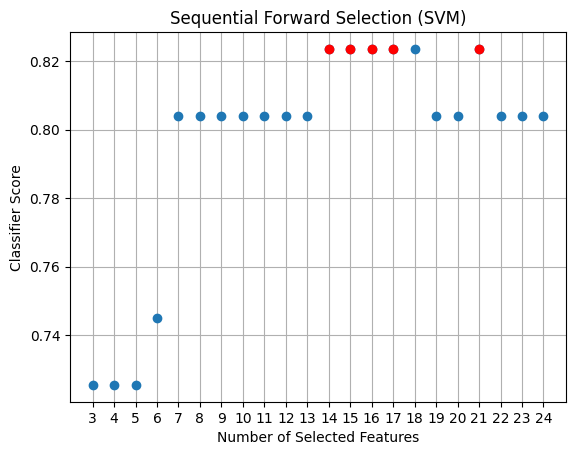

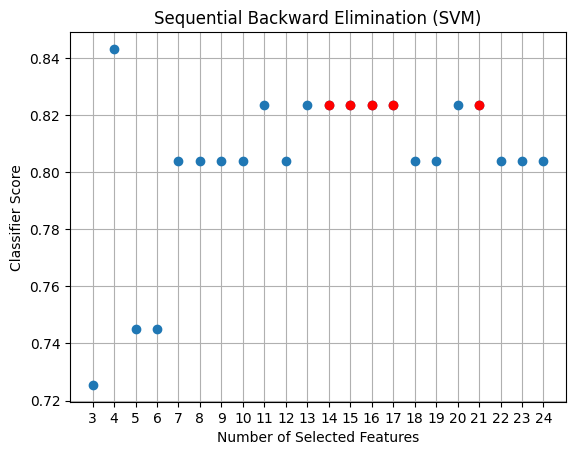

In [15]:
score_array = np.array(scores)
scores_backward_array = np.array(scores_backward)
features_array = np.array(features)

indices = score_array == scores_backward_array
score_array = score_array[indices]
scores_backward_array = scores_backward_array[indices]
features_array = features_array[indices]
indices = score_array == np.max(score_array)

plt.plot(features, scores, 'o')
plt.plot(features_array[indices], score_array[indices], 'o', c='red')
plt.xlabel('Number of Selected Features')
plt.ylabel('Classifier Score')
plt.title('Sequential Forward Selection (SVM)')
plt.xticks(range(3,len(column_names)-1))
#plt.yticks(scores)
plt.grid()
plt.show()

plt.plot(features, scores_backward, 'o')
plt.plot(features_array[indices], scores_backward_array[indices], 'o', c='red')
plt.xlabel('Number of Selected Features')
plt.ylabel('Classifier Score')
plt.title('Sequential Backward Elimination (SVM)')
plt.xticks(range(3,len(column_names)-1))
#plt.yticks(np.array(range(720, 846, 6))/1000)
plt.grid()
plt.show()


In [46]:
indices.shape
indices

array([False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False])

In [16]:
max = np.max(scores)
max

0.8235294117647058

In [17]:
bool1 = np.array(scores)
bool1[bool1 != max] = 0
sfs_indices = np.nonzero(bool1)


In [18]:
sfs_best_features = np.array(sfs_feature_list)[sfs_indices[0]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (22,) + inhomogeneous part.

In [19]:
bool2 = np.array(scores_backward)
bool2[bool2 != max] = 0
sbe_indices = np.nonzero(bool2)
sbe_best_features = np.array(sbe_feature_list)[sbe_indices[0]]
sbe_best_features

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (22,) + inhomogeneous part.

In [20]:
for item in sfs_best_features:
  print(item)
  
print('-----------------')
for item in sbe_best_features:
  print(item)
print('-----------------')

NameError: name 'sfs_best_features' is not defined

In [46]:
print(sfs_indices)
print(sbe_indices)

(array([11, 12, 13, 14, 15, 18]),)
(array([ 8, 10, 11, 12, 13, 14, 17, 18]),)


In [75]:
final_svm = SVC()
final_rf_5 = RandomForestClassifier(max_depth = 5)
final_rf_7 = RandomForestClassifier(max_depth = 7)

X = data.loc[ : , data.columns != 'ONCOGENIC']
X_1 = X[sfs_best_features[3]]
X_2 = X[sbe_best_features[4]]
y = data['ONCOGENIC'].values



In [76]:
scaler = proc.StandardScaler()
X_scaled_1 = scaler.fit_transform(X_1)
X_scaled_2 = scaler.fit_transform(X_2)

In [77]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled_1, y, test_size=0.33, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y, test_size=0.33, random_state=40)


In [78]:
final_svm.fit(X_train_1, y_train_1)
svm_sfs_score = final_svm.score(X_test_1, y_test_1)


In [79]:
final_svm.fit(X_train_2, y_train_2)
svm_sbe_score = final_svm.score(X_test_2, y_test_2)

In [80]:
final_rf_5.fit(X_train_1, y_train_1)
rf5_sfs_score = final_rf_5.score(X_test_1, y_test_1)

In [81]:
final_rf_5.fit(X_train_2, y_train_2)
rf5_sbe_score = final_rf_5.score(X_test_2, y_test_2)

In [82]:
final_rf_7.fit(X_train_1, y_train_1)
rf7_sfs_score = final_rf_7.score(X_test_1, y_test_1)

In [83]:
final_rf_7.fit(X_train_2, y_train_2)
rf7_sbe_score = final_rf_7.score(X_test_2, y_test_2)

In [85]:
print(f'SVM after forward selection: {svm_sfs_score} accuracy')
print(f'SVM after backward elimination: {svm_sbe_score} accuracy')

print(f'Random forest depth: 7, after forward selection : {rf7_sfs_score} accuracy')
print(f'Random forest depth: 7, after backward elimination  : {rf7_sbe_score} accuracy')

SVM after forward selection: 0.8235294117647058 accuracy
SVM after backward elimination: 0.8823529411764706 accuracy
Random forest depth: 7, after forward selection : 0.8431372549019608 accuracy
Random forest depth: 7, after backward elimination  : 0.9411764705882353 accuracy
